In [100]:
import numpy as np
from sklearn.metrics import classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cross_validation import train_test_split

import pandas as pd
from pickle import load, dump

from keras import metrics
import keras.backend as K
from keras.layers import *
from keras.layers.core import *
from keras.layers.recurrent import *
from keras.layers.merge import *
from keras.layers.convolutional import *
from keras.layers.embeddings import *
from keras.layers.wrappers import *
from keras.layers.normalization import *
from keras.layers.advanced_activations import *
from keras.models import *
from keras.callbacks import *
from keras.utils.vis_utils import *
from keras.utils import *

from IPython.display import SVG
import matplotlib.pyplot as plt

In [101]:
def read_data(path):
    Xs, Ys = pd.read_pickle(path)
    

    Xtrain, Xvalid, Xtest = Xs[:,:5725], Xs[:,5725:5725*2], Xs[:,5725*2:]
    
    Ys = np.concatenate([to_categorical(Ys[rowid])[None,:,:] for rowid in range(len(Ys))])
    Ytrain, Yvalid, Ytest = Ys[:,:5725], Ys[:,5725:5725*2], Ys[:,5725*2:]

    return Xtrain, Xvalid, Xtest, Ytrain, Yvalid, Ytest

In [106]:
Xtrain, Xvalid, Xtest, Ytrain, Yvalid, Ytest = read_data("../data/input.pkl")
Xtrain = np.concatenate([Xtrain, Xtest], axis=1)
Ytrain = np.concatenate([Ytrain, Ytest], axis=1)

In [107]:
print(f"train, X size: {Xtrain.shape}, Y size: {Ytrain.shape}")
print(f"test, X size: {Xvalid.shape}, Y size: {Yvalid.shape}")

train, X size: (2, 14070, 100, 5), Y size: (2, 14070, 2)
test, X size: (2, 5725, 100, 5), Y size: (2, 5725, 2)


In [108]:
epigenome = 0
Xtrain1 = Xtrain[epigenome]
Ytrain1 = Ytrain[epigenome]
Xvalid1 = Xvalid[epigenome]
Yvalid1 = Yvalid[epigenome]

Xtrain1 = np.concatenate([Xtrain1[:,:,np.random.permutation(5)] for i in range(5)], axis=0)
Ytrain1 = np.tile(Ytrain1, (5,1))
    
    

# Model definition

In [115]:
%%time 
# channel last
input_shape = (length_bin, num_marks)
input = Input(shape=input_shape)

nn = Conv1D(50, 10, padding='same', activation="relu")(input)
nn = BatchNormalization()(nn)
nn = MaxPooling1D(5, strides=5, padding='same')(nn)
nn = Dropout(0.3)(nn)
nn = Conv1D(50, 10, padding='same', activation="relu")(nn)
nn = BatchNormalization()(nn)
nn = MaxPooling1D(5, strides=5, padding='same')(nn)
nn = Dropout(0.3)(nn)
nn = Conv1D(50, 10, padding='same', activation="relu")(nn)
nn = BatchNormalization()(nn)
nn = MaxPooling1D(5, strides=5, padding='same')(nn)
nn = Dropout(0.3)(nn)
nn = Flatten()(nn)
nn = Dense(625, activation="relu")(nn)
nn = Dense(125, activation="relu")(nn)
nn = Dense(2, activation="softmax")(nn)


clf = Model(inputs=input, outputs=nn)
clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

CPU times: user 516 ms, sys: 116 ms, total: 632 ms
Wall time: 625 ms


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 100, 5)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 100, 50)           2550      
_________________________________________________________________
batch_normalization_13 (Batc (None, 100, 50)           200       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 20, 50)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 20, 50)            25050     
_________________________________________________________________
batch_normalization_14 (Batc (None, 20, 50)            200       
__________

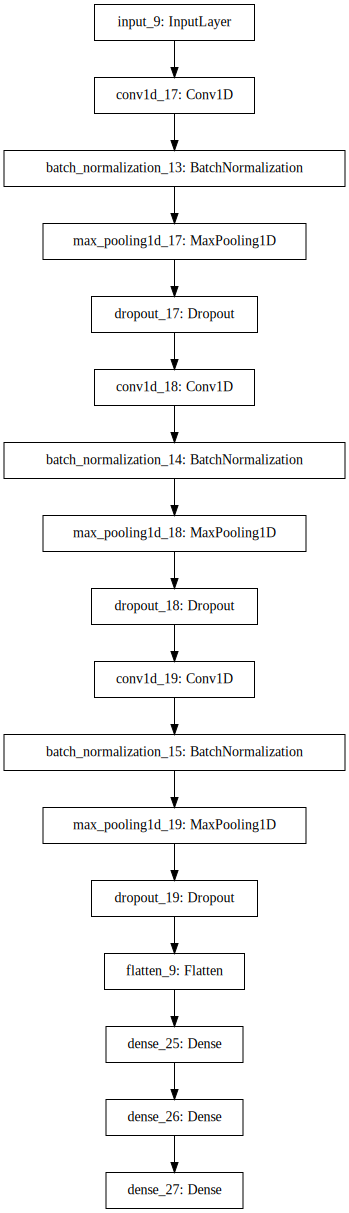

In [116]:
clf.summary()
SVG(model_to_dot(clf).create(prog='dot', format='svg'))

In [118]:
run_name = "deepchrome x3 augment 5 2:1 E013 2"
tb = TensorBoard(log_dir=f"../log/{run_name}", batch_size=32, write_graph=True)
checkpointer = ModelCheckpoint(filepath=f"../model/{run_name}.h5", verbose=1, save_best_only=True, monitor="val_acc")
stopper = EarlyStopping(monitor="val_acc", patience=3)

In [119]:
clf.fit(
    Xtrain1,
    Ytrain1,
    batch_size=2000,
    callbacks = [tb, checkpointer],
    epochs=1000,
    shuffle=True,
    validation_data=(Xvalid[epigenome], Yvalid[epigenome]),
    verbose=0)

Epoch 00000: val_acc improved from -inf to 0.56489, saving model to ../model/deepchrome x3 augment 5 2:1 E013 2.h5
Epoch 00001: val_acc improved from 0.56489 to 0.71249, saving model to ../model/deepchrome x3 augment 5 2:1 E013 2.h5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve


KeyboardInterrupt: 